<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/ISSvsSteven/blob/main/ISSvsSteven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install multipledispatch

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from PIL import Image
import os
from urllib.request import urlopen
import io
import seaborn as sns
import random

# Helper libraries
from IPython.core.pylabtools import figsize
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from multipledispatch import dispatch
import itertools
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from urllib.error import HTTPError
import sys

In [5]:
# TO SHOW IMAGE

@dispatch(list)
def magick(steeevaaa):
    global classes
    
    plt.figure(figsize=(8,8))
    plt.imshow(steeevaaa[0])
    plt.axis('off')

In [6]:
# TO SHOW IMAGES PAIR

@dispatch(list, list)
def magick(steeevaaa, issaaaa):
    global classes
    
    plt.figure(figsize=(8,8))

    for j, i in enumerate([steeevaaa, issaaaa]):
        plt.subplot(1, 2, j + 1)
        plt.title(classes[i[1]])
        plt.imshow(i[0])
        plt.axis('off')

In [7]:
# TO DOWNLOAD DATASET AND CHANGE SIZE

def download_set(data_path, class_name):
    global img_size
    only_img_list = []

    for img in os.listdir(data_path):
        img_arr =  cv2.imread(os.path.join(data_path, str(img)))
        # color channel conversion and circumcision))
        img_arr = cv2.cvtColor(cv2.resize(img_arr, dsize=(img_size, img_size)), cv2.COLOR_BGR2RGB)
        only_img_list.append(img_arr)

    return only_img_list

In [6]:
img_size = 8

/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC
602 0
/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена
520 1


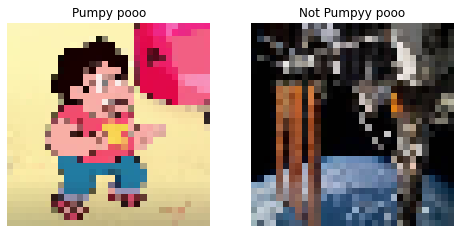

In [8]:
# FULL DATASET

full_ISS_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC"  # 602
full_Steven_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена"  # 520

directory = [full_ISS_dir, full_Steven_dir]

classes = ['Not Pumpyy pooo', 'Pumpy pooo']

full_img_list = []
full_base = []

img_size = 32

train_base = []
test_base = []
temp_arr = []

only_img_list_tr = []
only_img_list_tt = []

for d_set_path in directory:
    print(d_set_path)  # debag
    os.chdir(d_set_path)
    current_class = 0 if '/MKC' in d_set_path else 1
    full_img_list.extend(download_set(os.getcwd(), current_class))
    temp_arr = download_set(os.getcwd(), current_class)
    print(len(temp_arr), current_class)  # debag
    full_base.extend([[i, current_class] for i in temp_arr])

magick(full_base[800], full_base[4])

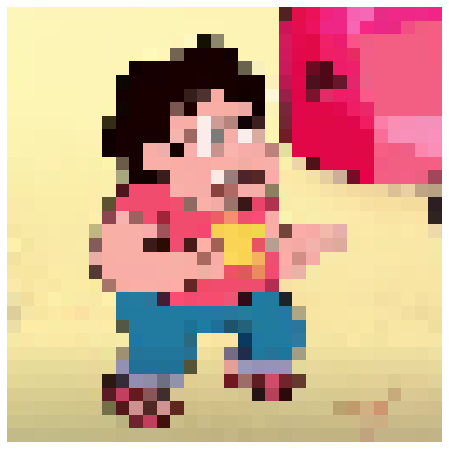

In [9]:
magick(full_base[800])
# plt.savefig("/content/drive/MyDrive/CoolSteven.png")

In [ ]:
print(type(full_base[0][0]))

<class 'numpy.ndarray'>


In [10]:
# BUILDING A RIGHT ARRAY MODE

random.shuffle(full_base)

x_full = []
y_full = []

x_train = []
y_train = []

x_test = []
y_test = []

for img, cls in full_base:
    x_full.append(img)
    y_full.append(cls)

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1, img_size, img_size, 3)
x_train = x_train/255

x_test = x_test.reshape(-1, img_size, img_size, 3)
x_test = x_test/255

print(f'x_train shape is : {x_train.shape}')  # debag
print(f'x_test shape is : {x_test.shape}')  # debag

y_train = to_categorical(y_train, num_classes=2)
print(f'y_train shape is : {y_train.shape}')  # debag

y_test = to_categorical(y_test, num_classes = 2)

x_train shape is : (717, 32, 32, 3)
x_test shape is : (225, 32, 32, 3)
y_train shape is : (717, 2)


In [13]:
# THE COOOOLEST CODE IN THE WORLD
# COUSE ITS WORKING
# ACTUALLY ITS BUILD NN ARCHITECTURE AND OPTIMISE IT WITH ADAM

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')  # debag
print(f'x_val is : {len(x_val)}')  # debag
print(f'y_train is : {len(y_train)}')  # debag
print(f'y_val is : {len(y_val)}')  # debag

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(img_size, img_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

x_train is : 366
x_val is : 92
y_train is : 366
y_val is : 92
Epoch 1/10
11/11 [==============================] - 1s 44ms/step - loss: 0.7875 - accuracy: 0.6018
Epoch 2/10
11/11 [==============================] - 0s 41ms/step - loss: 0.4765 - accuracy: 0.7695
Epoch 3/10
11/11 [==============================] - 0s 42ms/step - loss: 0.3361 - accuracy: 0.8443
Epoch 4/10
11/11 [==============================] - 0s 43ms/step - loss: 0.2276 - accuracy: 0.9102
Epoch 5/10
11/11 [==============================] - 0s 45ms/step - loss: 0.1562 - accuracy: 0.9641
Epoch 6/10
11/11 [==============================] - 0s 42ms/step - loss: 0.1233 - accuracy: 0.9551
Epoch 7/10
11/11 [==============================] - 0s 42ms/step - loss: 0.1369 - accuracy: 0.9491
Epoch 8/10
11/11 [==============================] - 0s 41ms/step - loss: 0.1019 - accuracy: 0.9611
Epoch 9/10
11/11 [==============================] - 0s 43ms/step - loss: 0.0863 - accuracy: 0.9760
Epoch 10/10
11/11 [============================

In [ ]:
# NOT THE COOOOLEST CODE IN THE WORLD

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')  # debag
print(f'x_val is : {len(x_val)}')  # debag
print(f'y_train is : {len(y_train)}')  # debag
print(f'y_val is : {len(y_val)}')  # debag

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_size, img_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.95      0.98      0.96        41

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



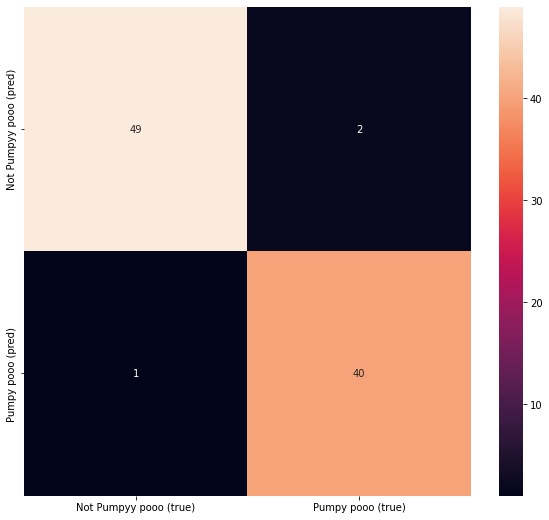

In [14]:
# CONTROL VALIDATION

from google.colab import data_table

y_pred = model.predict(x_val)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_cls)
data_table.enable_dataframe_formatter()
print(classification_report(y_true, y_pred_cls))
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       126
           1       0.98      0.98      0.98        99

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225



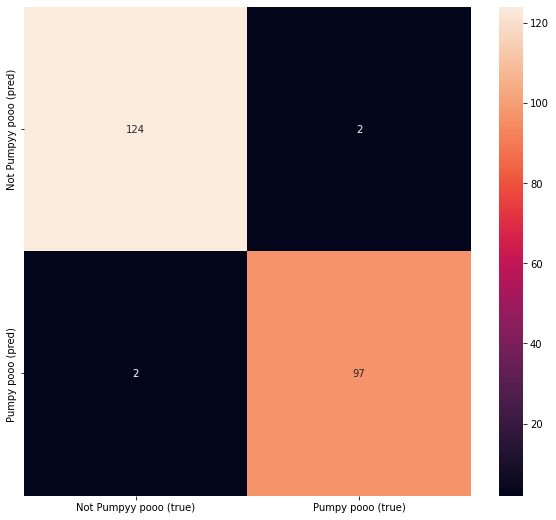

In [15]:
# TEST

y_pred2 = model.predict(x_test)
y_pred_cls2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
conf_mat2 = confusion_matrix(y_true2, y_pred_cls2)
print(classification_report(y_true2, y_pred_cls2))
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat2, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

In [ ]:
# os.remove('/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена/Screenshot_520.png')

In [28]:
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

Predict: its Pumpy pooo
Probability is: 99.83300018310547%
[1.0, 1.0, 1.0]
[1.0]


ValueError: ignored

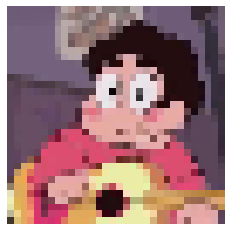

In [29]:
# URL IMAGE WORK

# Pumpy pooo
# https://c-cl.cdn.smule.com/rs-s87/arr/f8/65/e4b2a575-fbf4-4611-8f10-643c4b94bac6.jpg
# https://media.myshows.me/shows/1920/c/19/c19d86c712121a60f9ad75979d5860f7.jpg
# https://slovnet.ru/wp-content/uploads/2018/08/1-29.jpg  # dark bg

# Not Pumpyy pooo
# https://cdni.russiatoday.com/rbthmedia/images/2020.12/article/5feb853a85600a4a470fb151.jpg 


def get_check():
    global img_size

    fd = urlopen("https://c-cl.cdn.smule.com/rs-s87/arr/f8/65/e4b2a575-fbf4-4611-8f10-643c4b94bac6.jpg")

    # print(type(fd))  # debag
    image_file = io.BytesIO(fd.read())
    img = Image.open(image_file)
    img_arr = np.array(img)
    img_arr[20,30]
    plt.axis('off')
    # 

    # print(img_arr.shape)  # debag

    img_arr = cv2.resize(img_arr, dsize=(img_size, img_size))

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    plt.imshow(img_arr)  # debag
    
    # plt.savefig("/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена/Screenshot_520.png")


    img_arr = img_arr.reshape(-1, img_size, img_size, 3)
    img_arr = img_arr/255

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    return img_arr


true = 'Steven'
# true = 'ISS'

y_pred = model.predict(get_check())
y_pred_cls = np.argmax(y_pred, axis=1)

if true == 'Steven':
    y_true = [1] 
elif true == 'ISS':
    y_true = [0]
if y_true == y_pred_cls:
    print(f'Predict: its {classes[y_pred_cls[0]]}')
    print(f'Probability is: {round(np.amax([item * 100 for item in y_pred]), 3)}%')
else:
    print(f'Error. Its not {true}')
    print("y_pred = ", y_pred * 100)

plot_classification_report(classification_report(y_true, y_pred_cls))
conf_mat = confusion_matrix(y_true, y_pred_cls, labels=[0, 1])
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()
print(y_pred)


# cv2.resize(img_arr, dsize=(img_size, img_size))
# need to solve this problem!!!!!!!!!!

[0.62, 1.0, 0.76]
[0.93, 0.93, 0.93]
[0.59, 0.97, 0.73]
[0.47, 0.92, 0.62]
[1.0, 0.16, 0.28]
plotMat: [[0.62, 1.0, 0.76], [0.93, 0.93, 0.93], [0.59, 0.97, 0.73], [0.47, 0.92, 0.62], [1.0, 0.16, 0.28]]
support: [66, 40, 67, 272, 413]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


ImportError: ignored

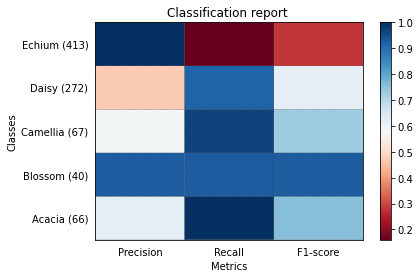

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


def main():
    sampleClassificationReport = """             precision    recall  f1-score   support

          Acacia       0.62      1.00      0.76        66
          Blossom       0.93      0.93      0.93        40
          Camellia       0.59      0.97      0.73        67
          Daisy       0.47      0.92      0.62       272
          Echium       1.00      0.16      0.28       413

        avg / total       0.77      0.57      0.49       858"""


    plot_classification_report(sampleClassificationReport)
    plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling